# Parallelization of Non-Negative Matrix Factorization with CUDA

TODO: Intro description here

## Import Modules

In [1]:
import time
import numpy as np
from sklearn.decomposition import NMF

from src.data_utils import get_matrices, get_topics, plot_execution_times, get_n_matrices, plot_loss
from src.nmf import NMF_serial, NMF_parallel

# reload modules every 2 seconds (to see changes)
%load_ext autoreload
%autoreload 2

## Load Dataset

In [2]:
# define number of topics to extract from data
num_topics = 25

# define X, W, H matrices
X, W, H = get_matrices(num_topics)

print("X: ", X.shape, ": number of articles = {}, number of unique words = {}".format(X.shape[0], X.shape[1]))
print("W: ", W.shape, ": number of articles = {}, number of topics = {}".format(W.shape[0], W.shape[1]))
print("H: ", H.shape, ": number of topics = {}, number of unique words = {}".format(H.shape[0], H.shape[1]))


X:  (3012, 8447) : number of articles = 3012, number of unique words = 8447
W:  (3012, 25) : number of articles = 3012, number of topics = 25
H:  (25, 8447) : number of topics = 25, number of unique words = 8447


## NMF with Euclidean Multiplicative Updates

TODO: maybe some descriptions here

### Serial Euclidean NMF with Python

In [3]:
num_iterations = 100
W_serial, H_serial, losses_serial, time_serial = NMF_serial(X, W, H)

print("{} iterations of serial Euclidean NMF completed in {} s.".format(num_iterations, round(time_serial, 3)))

Starting 100 iterations of serial NMF with euclidean loss.
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
100 iterations of serial Euclidean NMF completed in 44.495 s.


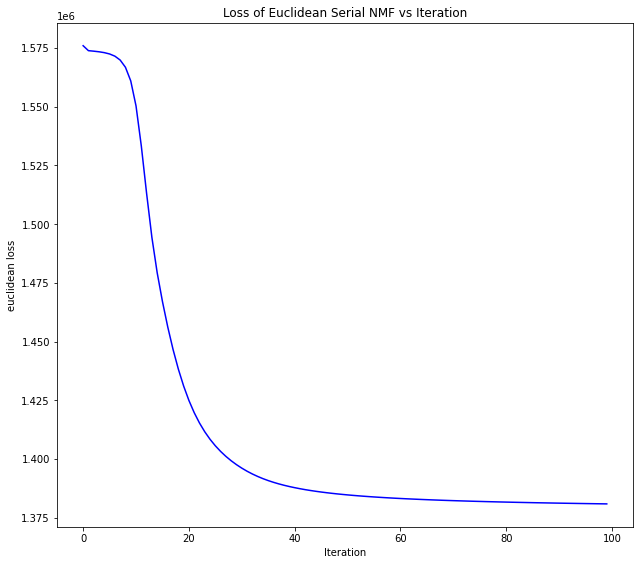

In [4]:
# visualize loss 
title = "Loss of Euclidean Serial NMF vs Iteration"
plot_loss(losses_serial, title)

In [5]:
# Visualize results
get_topics(W_serial, print_results=False) # NOTE: change W_serial --> W to see initial topics

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,...,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25
0,0.0240 percent,0.0623 states,0.0198 campaign,0.0421 father,0.0098 mile,0.0195 official,0.0263 pay,0.0146 company,0.0239 music,0.0202 second,...,0.0129 art,0.0107 serve,0.0161 question,0.0218 film,0.0192 building,0.0402 company,0.0194 thing,0.0282 case,0.0245 play,0.0129 public
1,0.0197 rate,0.0546 american,0.0180 vote,0.0382 graduate,0.0078 water,0.0134 force,0.0194 member,0.0137 computer,0.0128 performance,0.0201 hit,...,0.0097 artist,0.0097 add,0.0121 ask,0.0175 movie,0.0185 city,0.0296 executive,0.0138 tell,0.0218 court,0.0241 team,0.0093 change
2,0.0159 increase,0.0426 country,0.0179 political,0.0294 son,0.0075 hour,0.0132 military,0.0159 worker,0.0111 system,0.0126 play,0.0169 third,...,0.0077 exhibition,0.0091 minute,0.0102 report,0.0168 play,0.0131 house,0.0217 president,0.0133 ask,0.0214 lawyer,0.0240 game,0.0091 issue
3,0.0155 rise,0.0236 world,0.0175 party,0.0293 school,0.0073 car,0.0131 government,0.0159 money,0.0097 service,0.0111 perform,0.0149 start,...,0.0070 painting,0.0088 pepper,0.0093 issue,0.0140 television,0.0131 build,0.0204 business,0.0118 lot,0.0172 law,0.0190 player,0.0084 power
4,0.0133 economy,0.0150 americans,0.0168 election,0.0279 mrs,0.0068 place,0.0111 leader,0.0144 job,0.0096 technology,0.0105 song,0.0140 win,...,0.0064 museum,0.0087 food,0.0078 write,0.0120 director,0.0120 area,0.0191 chief,0.0114 feel,0.0144 state,0.0164 season,0.0078 policy
5,0.0123 report,0.0135 international,0.0164 republican,0.0261 daughter,0.0063 drive,0.0104 war,0.0136 union,0.0087 sell,0.0100 concert,0.0136 game,...,0.0061 collection,0.0084 oil,0.0077 tell,0.0118 character,0.0104 home,0.0138 chairman,0.0093 really,0.0143 judge,0.0140 point,0.0069 political
6,0.0113 low,0.0133 foreign,0.0163 candidate,0.0244 mother,0.0057 line,0.0083 troop,0.0119 law,0.0078 customer,0.0095 dance,0.0131 inning,...,0.0057 early,0.0083 cook,0.0071 interview,0.0103 production,0.0099 community,0.0112 vice,0.0090 start,0.0137 charge,0.0135 win,0.0062 problem
7,0.0111 economic,0.0098 nation,0.0144 democratic,0.0214 student,0.0056 foot,0.0076 peace,0.0116 service,0.0077 information,0.0093 night,0.0123 pitch,...,0.0055 form,0.0082 cup,0.0064 meeting,0.0097 star,0.0096 live,0.0104 industry,0.0086 put,0.0115 trial,0.0116 coach,0.0057 system
8,0.0102 growth,0.0098 european,0.0135 leader,0.0201 receive,0.0055 area,0.0074 attack,0.0114 official,0.0076 offer,0.0092 program,0.0123 home,...,0.0055 design,0.0080 sauce,0.0064 add,0.0091 actor,0.0096 resident,0.0093 large,0.0083 little,0.0108 legal,0.0097 second,0.0056 believe
9,0.0085 decline,0.0093 trade,0.0134 voter,0.0196 marry,0.0053 road,0.0070 agreement,0.0112 bill,0.0073 product,0.0084 sound,0.0116 victory,...,0.0054 view,0.0076 taste,0.0060 member,0.0085 direct,0.0092 site,0.0089 director,0.0082 keep,0.0094 file,0.0088 victory,0.0047 view


### Serial Euclidean NMF with Scikit-Learn

In [30]:
start = time.time() # record start time

# define NMF model in sklearn with same parameters
num_sklearn_iterations = 1000
# NOTE: change num_iterations --> num_sklearn_iterations to see execution time to sufficient convergence
model = NMF(n_components=num_topics, init='custom', max_iter=num_iterations, solver='mu', tol=1e-10)
W_sklearn = model.fit_transform(X, W=W, H=H)
H_sklearn = model.components_

end = time.time()
time_sklearn = end - start

print("{} iterations of sklearn Euclidean NMF completed in {} s.".format(num_iterations, round(time_sklearn, 3)))


/home/alexangus/envs/cudaEnv/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


100 iterations of sklearn Euclidean NMF completed in 25.302 s.


In [31]:
# Visualize results
get_topics(W_sklearn, print_results=False)

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,...,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25
0,0.0346 percent,0.0549 states,0.0184 political,0.0525 school,0.0088 hour,0.0144 force,0.0647 official,0.0237 company,0.0243 music,0.0259 second,...,0.0135 art,0.0108 serve,0.0152 ask,0.0229 film,0.0190 building,0.0425 president,0.0250 thing,0.0283 case,0.0301 team,0.0095 issue
1,0.0195 rate,0.0428 american,0.0181 campaign,0.0408 student,0.0079 mile,0.0142 military,0.0272 city,0.0132 computer,0.0127 performance,0.0184 third,...,0.0101 artist,0.0100 add,0.0128 question,0.0184 play,0.0153 city,0.0374 executive,0.0147 lot,0.0222 court,0.0281 play,0.0095 change
2,0.0182 rise,0.0421 country,0.0168 vote,0.0213 child,0.0076 car,0.0121 war,0.0238 member,0.0102 service,0.0122 play,0.0177 win,...,0.0082 exhibition,0.0090 minute,0.0127 tell,0.0181 movie,0.0142 build,0.0255 chief,0.0133 feel,0.0216 lawyer,0.0273 game,0.0093 public
3,0.0145 increase,0.0235 world,0.0162 party,0.0181 education,0.0061 drive,0.0112 government,0.0165 agency,0.0098 system,0.0115 perform,0.0172 hit,...,0.0073 painting,0.0090 pepper,0.0074 meeting,0.0133 character,0.0135 area,0.0215 vice,0.0124 put,0.0197 law,0.0240 player,0.0080 problem
4,0.0142 price,0.0141 government,0.0153 election,0.0169 teacher,0.0061 night,0.0111 official,0.0149 group,0.0097 industry,0.0108 song,0.0151 victory,...,0.0068 museum,0.0087 oil,0.0071 write,0.0133 television,0.0130 house,0.0191 company,0.0115 really,0.0145 judge,0.0204 season,0.0069 system
5,0.0129 market,0.0138 foreign,0.0151 candidate,0.0160 college,0.0059 line,0.0107 leader,0.0126 worker,0.0096 technology,0.0101 concert,0.0149 score,...,0.0064 collection,0.0087 food,0.0068 interview,0.0122 director,0.0107 home,0.0190 director,0.0111 little,0.0132 charge,0.0144 coach,0.0061 power
6,0.0128 report,0.0123 international,0.0150 republican,0.0158 parent,0.0058 stop,0.0087 troop,0.0120 union,0.0088 business,0.0096 dance,0.0127 game,...,0.0058 early,0.0085 cook,0.0064 meet,0.0110 production,0.0102 resident,0.0190 yesterday,0.0111 start,0.0128 state,0.0122 point,0.0051 policy
7,0.0127 low,0.0117 americans,0.0133 democratic,0.0145 class,0.0058 place,0.0078 peace,0.0118 job,0.0087 product,0.0092 night,0.0126 start,...,0.0057 design,0.0084 cup,0.0063 speak,0.0099 star,0.0098 project,0.0160 chairman,0.0109 big,0.0113 legal,0.0115 win,0.0049 point
8,0.0118 fall,0.0115 nation,0.0124 leader,0.0139 program,0.0054 trip,0.0077 attack,0.0115 problem,0.0087 customer,0.0087 program,0.0108 lose,...,0.0055 gallery,0.0081 sauce,0.0063 issue,0.0096 actor,0.0096 live,0.0148 name,0.0102 keep,0.0112 trial,0.0086 league,0.0046 mean
9,0.0107 point,0.0102 economic,0.0123 voter,0.0113 graduate,0.0054 water,0.0067 nations,0.0111 public,0.0083 sell,0.0085 sound,0.0108 home,...,0.0055 image,0.0077 small,0.0061 report,0.0092 direct,0.0093 community,0.0134 father,0.0101 ask,0.0096 file,0.0082 pass,0.0045 believe


### Parallel Euclidean NMF with CUDA

In [36]:
W_parallel, H_parallel, time_parallel = NMF_parallel(X, W, H)

print("{} iterations of parallel Euclidean NMF completed in {} s.".format(num_iterations, round(time_parallel, 3)))

Starting 100 iterations of parallel NMF with euclidean multiplicative updates.
iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90
iteration 100
100 iterations of parallel Euclidean NMF completed in 1.046 s.


In [37]:
# Visualize results
get_topics(W_parallel, print_results=False)

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,...,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25
0,0.0350 percent,0.0548 states,0.0182 political,0.0513 school,0.0088 hour,0.0148 force,0.0748 official,0.0247 company,0.0243 music,0.0261 second,...,0.0137 art,0.0108 serve,0.0165 ask,0.0223 film,0.0189 building,0.0456 president,0.0253 thing,0.0280 case,0.0323 team,0.0087 change
1,0.0197 rate,0.0433 american,0.0178 campaign,0.0399 student,0.0078 mile,0.0143 military,0.0216 city,0.0125 computer,0.0127 performance,0.0185 win,...,0.0103 artist,0.0100 add,0.0140 tell,0.0181 play,0.0171 city,0.0349 executive,0.0148 lot,0.0220 court,0.0291 play,0.0086 issue
2,0.0183 rise,0.0421 country,0.0165 vote,0.0201 child,0.0076 car,0.0123 war,0.0214 member,0.0103 industry,0.0121 play,0.0174 third,...,0.0084 exhibition,0.0091 minute,0.0127 question,0.0176 movie,0.0142 build,0.0243 chief,0.0134 feel,0.0213 lawyer,0.0281 game,0.0075 public
3,0.0149 price,0.0228 world,0.0159 party,0.0178 education,0.0062 drive,0.0110 leader,0.0180 agency,0.0098 service,0.0114 perform,0.0159 score,...,0.0074 painting,0.0090 pepper,0.0076 meeting,0.0134 character,0.0134 area,0.0230 vice,0.0126 put,0.0197 law,0.0263 player,0.0072 problem
4,0.0145 increase,0.0151 government,0.0150 election,0.0165 teacher,0.0061 night,0.0107 government,0.0142 report,0.0097 business,0.0108 song,0.0157 victory,...,0.0070 museum,0.0087 oil,0.0074 write,0.0127 television,0.0125 house,0.0220 director,0.0116 really,0.0144 judge,0.0223 season,0.0063 system
5,0.0133 market,0.0141 foreign,0.0148 republican,0.0155 college,0.0058 place,0.0088 troop,0.0122 spokesman,0.0092 technology,0.0101 concert,0.0151 hit,...,0.0066 collection,0.0086 food,0.0071 interview,0.0119 director,0.0102 resident,0.0194 yesterday,0.0116 little,0.0131 charge,0.0156 coach,0.0057 power
6,0.0129 report,0.0124 international,0.0148 candidate,0.0150 parent,0.0056 line,0.0082 official,0.0115 problem,0.0091 system,0.0096 dance,0.0131 game,...,0.0059 early,0.0085 cook,0.0068 speak,0.0106 production,0.0102 home,0.0183 father,0.0112 big,0.0127 state,0.0101 win,0.0050 point
7,0.0128 low,0.0116 americans,0.0131 democratic,0.0143 class,0.0056 stop,0.0079 peace,0.0111 public,0.0090 product,0.0091 night,0.0114 lose,...,0.0057 design,0.0085 cup,0.0068 meet,0.0096 star,0.0100 project,0.0182 graduate,0.0111 start,0.0113 legal,0.0098 league,0.0045 mean
8,0.0116 fall,0.0114 nation,0.0122 leader,0.0143 program,0.0055 trip,0.0078 attack,0.0103 office,0.0088 customer,0.0087 program,0.0111 start,...,0.0057 gallery,0.0081 sauce,0.0062 news,0.0094 story,0.0097 community,0.0163 name,0.0103 keep,0.0110 trial,0.0093 point,0.0044 believe
9,0.0105 economy,0.0103 economic,0.0120 voter,0.0095 teach,0.0052 water,0.0067 nations,0.0095 group,0.0087 sell,0.0086 sound,0.0093 point,...,0.0055 image,0.0078 small,0.0061 appear,0.0094 actor,0.0093 live,0.0153 chairman,0.0100 job,0.0095 file,0.0086 pass,0.0043 policy


### Visualize Execution Time Differences

In [38]:
# input_sizes = [10**i for i in range(1, 5)] # define range of input sizes
input_sizes = [10**i for i in range(1, 4)] # define range of input sizes


K = 25 # define learnable dimension size parameter

execution_times_parallel = [] # initialize execution time lists
execution_times_serial = []

for input_size in input_sizes: # iterate over input sizes
    input_shape = (input_size, input_size)
    X, W, H = get_n_matrices(K, input_shape) # generate random X, W, H matrices of size input_shape
    W_p, H_p, ex_time_parallel = NMF_parallel(X, W, H, print_iterations=False) # call parallel NMF
    W_s, H_s, _, ex_time_serial = NMF_serial(X, W, H, print_iterations=False) # call sequential NMF

    execution_times_parallel.append(ex_time_parallel) # store execution times
    execution_times_serial.append(ex_time_serial)

Starting 100 iterations of parallel NMF with euclidean multiplicative updates.
Starting 100 iterations of serial NMF with euclidean loss.
Starting 100 iterations of parallel NMF with euclidean multiplicative updates.
Starting 100 iterations of serial NMF with euclidean loss.
Starting 100 iterations of parallel NMF with euclidean multiplicative updates.
Starting 100 iterations of serial NMF with euclidean loss.


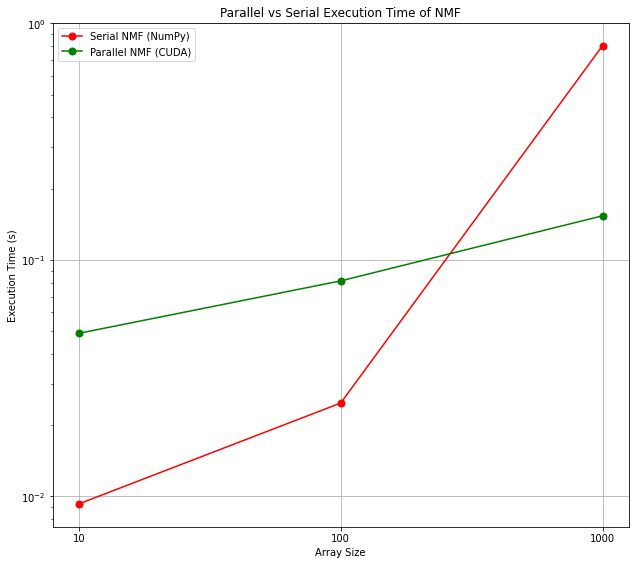

In [39]:
title = "Parallel vs Serial Execution Time of NMF" # define plot title

# generate plot
plot_execution_times(execution_times_parallel,  
                     execution_times_serial, 
                     title,
                     input_sizes)

## NMF with KL Divergence Multiplicative Updates

### Serial KL Divergence NMF with Python

In [40]:
# define number of topics to extract from data
num_topics = 25

# define X, W, H matrices
X, W, H = get_matrices(num_topics)

W_serial_kl, H_serial_kl, losses_serial_kl, time_serial_kl = NMF_serial(X, W, H, loss='divergence')

print("{} iterations of serial KL Divergence NMF completed in {} s.".format(num_iterations, round(time_serial_kl, 3)))

Starting 100 iterations of serial NMF with divergence loss.
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
100 iterations of serial KL Divergence NMF completed in 119.835 s.


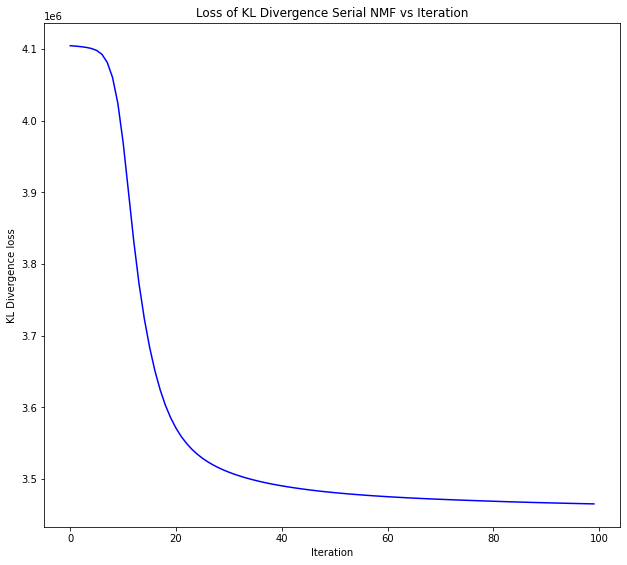

In [41]:
# visualize loss
title = "Loss of KL Divergence Serial NMF vs Iteration"
plot_loss(losses_serial_kl, title, loss_type='KL Divergence')

In [42]:
# Visualize results
get_topics(W_serial_kl, print_results=False)

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,...,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25
0,0.0243 sell,0.0308 school,0.0311 police,0.0557 father,0.0115 cause,0.0157 official,0.0163 pay,0.0206 food,0.0231 music,0.0371 team,...,0.0204 art,0.0123 design,0.0197 country,0.0182 television,0.0155 mile,0.0393 company,0.0178 thing,0.0179 case,0.0241 win,0.0212 campaign
1,0.0203 sale,0.0259 student,0.0191 kill,0.0465 son,0.0098 problem,0.0120 military,0.0154 money,0.0113 fresh,0.0197 play,0.0249 player,...,0.0126 artist,0.0100 color,0.0164 government,0.0069 network,0.0118 travel,0.0212 executive,0.0133 feel,0.0157 court,0.0208 second,0.0171 vote
2,0.0184 company,0.0122 child,0.0183 officer,0.0437 mrs,0.0090 damage,0.0118 american,0.0138 state,0.0108 serve,0.0149 performance,0.0244 season,...,0.0093 history,0.0095 wall,0.0160 political,0.0068 video,0.0106 hour,0.0154 business,0.0130 ask,0.0155 lawyer,0.0166 play,0.0144 political
3,0.0179 store,0.0118 program,0.0158 man,0.0386 mother,0.0073 plant,0.0109 states,0.0128 budget,0.0098 pound,0.0101 perform,0.0237 game,...,0.0090 century,0.0091 display,0.0112 american,0.0066 medium,0.0106 town,0.0145 president,0.0126 lot,0.0140 law,0.0164 game,0.0142 election
4,0.0173 buy,0.0118 class,0.0153 charge,0.0362 daughter,0.0073 water,0.0094 war,0.0128 bill,0.0096 eat,0.0100 stage,0.0192 play,...,0.0080 image,0.0071 room,0.0108 policy,0.0063 computer,0.0104 car,0.0131 chief,0.0114 tell,0.0111 judge,0.0152 victory,0.0141 candidate
5,0.0130 price,0.0109 education,0.0135 crime,0.0286 graduate,0.0070 official,0.0087 force,0.0109 tax,0.0090 restaurant,0.0099 production,0.0159 coach,...,0.0072 american,0.0065 small,0.0105 states,0.0061 program,0.0099 city,0.0109 share,0.0110 really,0.0097 legal,0.0137 score,0.0136 party
6,0.0121 business,0.0108 college,0.0131 arrest,0.0260 family,0.0066 report,0.0080 meeting,0.0102 program,0.0088 taste,0.0099 theater,0.0123 baseball,...,0.0071 culture,0.0064 glass,0.0104 nation,0.0060 movie,0.0094 trip,0.0101 chairman,0.0093 little,0.0087 issue,0.0132 third,0.0131 republican
7,0.0108 cost,0.0093 group,0.0123 death,0.0246 marry,0.0057 scientist,0.0078 government,0.0098 cut,0.0086 dry,0.0099 dance,0.0115 league,...,0.0070 world,0.0064 light,0.0103 leader,0.0059 screen,0.0087 road,0.0087 yesterday,0.0090 happen,0.0080 rule,0.0123 point,0.0103 democratic
8,0.0107 industry,0.0089 teacher,0.0117 official,0.0206 receive,0.0055 safety,0.0069 nations,0.0095 plan,0.0083 cook,0.0095 song,0.0094 contract,...,0.0070 exhibition,0.0064 red,0.0100 power,0.0058 create,0.0086 train,0.0087 announce,0.0087 put,0.0077 charge,0.0104 lose,0.0091 voter
9,0.0105 customer,0.0088 community,0.0102 victim,0.0205 retire,0.0054 system,0.0069 agreement,0.0092 cost,0.0082 fish,0.0095 audience,0.0092 football,...,0.0069 photograph,0.0062 open,0.0088 economic,0.0056 different,0.0084 drive,0.0086 financial,0.0082 keep,0.0076 state,0.0101 final,0.0091 support


### Serial KL Divergence NMF with Scikit-Learn

In [43]:
start = time.time() # record start time

# define NMF model in sklearn with same parameters
num_sklearn_iterations = 1000
# NOTE: change num_iterations --> num_sklearn_iterations to see execution time to sufficient convergence
model_kl = NMF(n_components=num_topics, init='custom', beta_loss='kullback-leibler', max_iter=num_iterations, solver='mu', tol=1e-10)
W_sklearn_kl = model_kl.fit_transform(X, W=W, H=H)
H_sklearn_kl = model_kl.components_

end = time.time()
time_sklearn_kl = end - start

print("{} iterations of sklearn Euclidean NMF completed in {} s.".format(num_iterations, round(time_sklearn_kl, 3)))


/home/alexangus/envs/cudaEnv/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


100 iterations of sklearn Euclidean NMF completed in 45.33 s.


In [44]:
# Visualize results
get_topics(W_sklearn_kl, print_results=False)

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,...,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25
0,0.0306 percent,0.0316 school,0.0277 police,0.0534 father,0.0266 report,0.0161 military,0.0179 pay,0.0117 water,0.0201 play,0.0388 team,...,0.0172 music,0.0154 food,0.0187 political,0.0110 thing,0.0123 city,0.0368 company,0.0149 wait,0.0172 case,0.0271 win,0.0201 states
1,0.0187 price,0.0264 student,0.0194 charge,0.0445 son,0.0137 official,0.0143 war,0.0164 money,0.0117 plant,0.0158 thing,0.0277 season,...,0.0133 art,0.0096 serve,0.0184 campaign,0.0085 great,0.0121 town,0.0207 executive,0.0135 ask,0.0154 court,0.0235 second,0.0181 american
2,0.0181 rate,0.0120 class,0.0153 officer,0.0419 mrs,0.0109 appear,0.0123 government,0.0146 state,0.0088 air,0.0119 lot,0.0274 game,...,0.0109 play,0.0093 restaurant,0.0183 vote,0.0081 question,0.0114 visit,0.0174 business,0.0131 tell,0.0152 law,0.0164 victory,0.0153 country
3,0.0179 market,0.0118 child,0.0150 man,0.0397 mother,0.0106 number,0.0113 force,0.0130 budget,0.0083 plane,0.0109 guy,0.0239 player,...,0.0096 artist,0.0090 fresh,0.0138 party,0.0078 mean,0.0090 mile,0.0138 president,0.0127 walk,0.0141 lawyer,0.0164 score,0.0151 policy
4,0.0152 rise,0.0114 education,0.0124 crime,0.0347 daughter,0.0106 problem,0.0109 leader,0.0115 bill,0.0083 car,0.0106 young,0.0169 coach,...,0.0093 performance,0.0084 taste,0.0135 election,0.0077 put,0.0089 home,0.0124 chief,0.0114 start,0.0110 legal,0.0162 play,0.0125 editor
5,0.0114 economy,0.0111 program,0.0120 arrest,0.0273 graduate,0.0097 condition,0.0088 american,0.0113 tax,0.0081 flight,0.0105 tell,0.0167 play,...,0.0076 director,0.0079 dry,0.0133 candidate,0.0073 far,0.0086 live,0.0122 share,0.0107 feel,0.0109 rule,0.0150 game,0.0115 government
6,0.0109 increase,0.0106 college,0.0108 official,0.0259 family,0.0095 release,0.0087 official,0.0107 cost,0.0076 gas,0.0087 really,0.0127 league,...,0.0076 theater,0.0074 dinner,0.0132 republican,0.0072 point,0.0084 local,0.0100 sell,0.0100 decide,0.0107 judge,0.0148 third,0.0101 official
7,0.0103 low,0.0105 group,0.0101 criminal,0.0236 marry,0.0095 accord,0.0085 peace,0.0105 program,0.0070 vehicle,0.0087 watch,0.0126 baseball,...,0.0075 stage,0.0073 eat,0.0124 leader,0.0067 kind,0.0082 travel,0.0096 chairman,0.0090 thing,0.0099 issue,0.0139 point,0.0091 nation
8,0.0100 fall,0.0094 community,0.0100 kill,0.0197 retire,0.0092 continue,0.0079 country,0.0103 cut,0.0070 cause,0.0086 little,0.0094 football,...,0.0074 production,0.0072 cook,0.0109 democratic,0.0066 certainly,0.0078 car,0.0092 financial,0.0087 stay,0.0094 decision,0.0121 final,0.0086 foreign
9,0.0092 growth,0.0094 teacher,0.0094 yesterday,0.0195 receive,0.0092 occur,0.0073 nations,0.0102 plan,0.0069 safety,0.0085 hear,0.0089 contract,...,0.0073 audience,0.0071 add,0.0099 support,0.0066 different,0.0076 hour,0.0088 firm,0.0086 job,0.0088 state,0.0111 lose,0.0082 threat


### Parallel Euclidean NMF with CUDA

In [ ]:
W_parallel_kl, H_parallel_kl, time_parallel_kl = NMF_parallel(X, W, H, loss='divergence')

print("{} iterations of parallel Euclidean NMF completed in {} s.".format(num_iterations, round(time_parallel, 3)))